<a href="https://colab.research.google.com/github/AngeliaCristin/Data_Mining/blob/main/015_Angelia_Cristin_DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Ulasan Pengguna dalam Menentukan Produk Rekomendasi di Sephora**

#**Import Library**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#**BUSINESS UNDERSTANDING**

##**Business Objective**

tujuan bisnis dari dataset ini adalah untuk mengetahui produk sephora yang direkomendasikan untuk pelanggan melalui analisis sentimen review pengguna terhadap produk Sephora sehingga dapat menciptakan kepuasan pelanggan. Dengan meningkatnya kepuasan pelanggan akan produk Sephora, dapat meningkatkan kepercayaan dan penjualan produk sehingga pendapatan bisnis juga meningkat.

##**Assess Situation**

situasi bisnis yang mendasari analisis ini adalah persaingan pasar yang semakin ketat antara Produk dan Perawatan Kulit Sephora dengan produk Produk dan Perawatan Kulit lainnya, sehingga Shepora harus dapat bersaing untuk mempertahankan pelanggan agar tetap memilih produk Sephora dibanding produk lain. Untuk itu dilakukan usaha dalam menganalisis produk/merek apa yang direkomendasikan ke pelanggan melalui review pengguna dalam menjaga dan meningktakan kepuasan pelanggan sephora sehingga tetap memilih sephora sebagai sarana pembelian Produk dan Perawatan Kulit.

##**Data Mining Goals**

tujuan dari data mining pada data set ini adalah Mengelompokkan produk shepora yang populer atau direkomendasikan melalui analisis sentimen ulasan pelanggan/pengguna Shepora sehingga dapat meningkatkan pengalaman dan kepuasan pelanggan/pengguna Shepora.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data terkait review Produk dan skincare Sephora dari sumber yang tersedia. Setelah berhasil mengumpulkan data review Produk dan skincare Sephora, langkah selanjutnya melibatkan pembersihan dan preprocessing data untuk menjamin keakuratan dan konsistensi dataset. Dilanjutkan dengan Exploratory Data Analysis (EDA) untuk memahami korelasi antar variabel. Selanjutnya, analisis sentimen akan dilakukan dengan menerapkan pemrosesan bahasa alami untuk mengklasifikasikan ulasan.Hasil analisis akan diinterpretasikan untuk membentuk kesimpulan dan rekomendasi yang mendukung tujuan awal proyek.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset ini didapat dari Kaggel, dikumpulkan melalui scraper Python pada Maret 2023, dan berisi informasi tentang semua produk kecantikan (lebih dari 8.000) dari toko online Sephora.

Link Dataset: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews

In [2]:
df = pd.read_csv('/content/product_info.csv')
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


##**Describe Data**

####Informasi Dasar

In [3]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 8494
Jumlah kolom: 27


Dari output diatas, dapat diketahui bahwa dataset terdiri dari 8494 baris atau data dengan kolom sebanyak 27 kolom.

####Informasi Lanjutan

In [4]:
#Ketikan kode di sini, untuk menampilkan informasi lengkap dari hbh kalian
print("Informasi Lengkap HBH Dataset:")
print("-" * 40)
print(df.info())


Informasi Lengkap HBH Dataset:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null

Penjelasan terkait informasi lengkap hbh dataset:
1. **product_id**: ID unik untuk setiap produk. Terdapat 8494 baris data, dan tipe datanya adalah object (string), menunjukkan bahwa nilai-nilai dalam kolom ini berupa string atau teks.

2. **product_name**: Nama produk yang sesuai dengan ID unik. Jumlah baris data sama dengan product_id, yaitu 8494. Tipe datanya adalah object (string).

3. **brand_id**: ID merek yang terkait dengan setiap produk. Tipe data kolom ini adalah integer (int64) dan terdapat 8494 baris.

4. **brand_name**: Nama merek yang berkaitan dengan setiap produk. Tipe data kolom ini adalah object (string) dan terdapat 8494 baris.

5. **loves_count**: Jumlah "loves" atau suka pada produk. Tipe data kolom ini adalah integer (int64) dan terdapat 8494 baris.

6. **rating**: Nilai rating produk. Terdapat 8216 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah float64.

7. **reviews**: Jumlah ulasan untuk setiap produk. Terdapat 8216 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah float64.

8. **size**: Informasi mengenai ukuran produk. Terdapat 6863 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah object (string).

9. **variation_type**: Jenis variasi dari produk. Terdapat 7050 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah object (string).

10. **variation_value**: Nilai variasi dari produk. Terdapat 6896 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah object (string).

11. **variation_desc**: Deskripsi variasi dari produk. Terdapat 1250 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian besar data. Tipe data kolom ini adalah object (string).

12. **ingredients**: Informasi mengenai bahan-bahan yang digunakan dalam produk. Terdapat 7549 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada beberapa data. Tipe data kolom ini adalah object (string).

13. **price_usd**: Harga produk dalam mata uang USD. Tipe data kolom ini adalah float64.

14. **value_price_usd**: Harga produk dalam mata uang USD untuk nilai tertentu. Terdapat 451 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah float64.

15. **sale_price_usd**: Harga produk saat sedang diskon dalam mata uang USD. Terdapat 270 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah float64.

16. **limited_edition**: Menunjukkan apakah produk ini merupakan edisi terbatas atau tidak. Tipe data kolom ini adalah integer (int64).

17. **new**: Menunjukkan apakah produk ini baru atau tidak. Tipe data kolom ini adalah integer (int64).

18. **online_only**: Menunjukkan apakah produk ini hanya tersedia secara online atau tidak. Tipe data kolom ini adalah integer (int64).

19. **out_of_stock**: Menunjukkan apakah produk ini sedang kehabisan stok atau tidak. Tipe data kolom ini adalah integer (int64).

20. **sephora_exclusive**: Menunjukkan apakah produk ini eksklusif hanya dijual di Sephora atau tidak. Tipe data kolom ini adalah integer (int64).

21. **highlights**: Poin-poin utama atau fitur-fitur produk. Terdapat 6287 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah object (string).

22. **primary_category**: Kategori utama dari produk. Terdapat 8494 baris data dengan tipe data object (string).

23. **secondary_category**: Kategori sekunder dari produk. Terdapat 8486 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah object (string).

24. **tertiary_category**: Kategori ketiga dari produk. Terdapat 7504 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah object (string).

25. **child_count**: Jumlah produk turunan atau variasi dari produk utama. Tipe data kolom ini adalah integer (int64).

26. **child_max_price**: Harga maksimum dari produk turunan. Terdapat 2754 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah float64.

27. **child_min_price**: Harga minimum dari produk turunan. Terdapat 2754 nilai non-null dari total 8494 baris, menunjukkan adanya nilai null pada sebagian data. Tipe data kolom ini adalah float64.

####Informasi Statistik Deskriptif

In [5]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian
df.describe()


,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


Berikut ini adalah penjelasan  hasil statistik deskriptif dari kolom numerik yang ada pada dataset:
1. **brand_id:** Rata-rata brand_id dalam data adalah 5422.44 dengan standar deviasi sekitar 1709.60. Rentang brand_id adalah dari 1063 hingga 8020. Kuartil pertama (25%) dari brand_id adalah 5333, sementara kuartil ketiga (75%) adalah 6328. Ini menunjukkan variasi yang cukup besar dalam distribusi brand_id.

2. **loves_count:** Rata-rata jumlah loves_count adalah 29,179.57 dengan standar deviasi sekitar 66,092.12. Rentang loves_count adalah dari 0 hingga 1,401,068. Kuartil pertama (25%) dari loves_count adalah 3,758, sementara kuartil ketiga (75%) adalah 26,841. Ini menunjukkan adanya variasi besar dalam jumlah loves_count, dengan sebagian besar produk memiliki jumlah loves_count yang relatif rendah.

3. **rating:** Rata-rata rating produk adalah 4.19 dengan standar deviasi sekitar 0.52. Rentang rating adalah dari 1 hingga 5. Kuartil pertama (25%) dari rating adalah 3.98, sementara kuartil ketiga (75%) adalah 4.53. Ini menunjukkan bahwa mayoritas produk memiliki rating di atas 4, menunjukkan kepuasan pelanggan yang tinggi.

4. **reviews:** Rata-rata jumlah reviews adalah 448.55 dengan standar deviasi sekitar 1101.98. Rentang reviews adalah dari 1 hingga 21,281. Kuartil pertama (25%) dari reviews adalah 26, sementara kuartil ketiga (75%) adalah 418. Ini menunjukkan variasi besar dalam jumlah reviews, dengan sebagian besar produk memiliki jumlah reviews yang relatif rendah.

5. **price_usd:** Rata-rata harga produk dalam data adalah $51.66 dengan standar deviasi sekitar $53.67. Rentang harga adalah dari $3 hingga $1900. Kuartil pertama (25%) dari harga adalah $25, sementara kuartil ketiga (75%) adalah $58. Ini menunjukkan variasi besar dalam harga produk.

6. **value_price_usd:** Rata-rata value_price_usd adalah $91.17 dengan standar deviasi sekitar $79.20. Rentang value_price_usd adalah dari $0 hingga $617. Kuartil pertama (25%) dari value_price_usd adalah $45, sementara kuartil ketiga (75%) adalah $108.50. Ini menunjukkan variasi besar dalam nilai harga produk.

7. **sale_price_usd:** Rata-rata sale_price_usd adalah $20.21 dengan standar deviasi sekitar $24.33. Rentang sale_price_usd adalah dari $1.75 hingga $320. Kuartil pertama (25%) dari sale_price_usd adalah $8, sementara kuartil ketiga (75%) adalah $25. Ini menunjukkan variasi besar dalam harga produk saat diskon.

8. **limited_edition:** Sekitar 7.03% dari produk dalam dataset merupakan limited edition.

9. **new:** Sekitar 7.17% dari produk dalam dataset adalah produk baru.

10. **online_only:** Sekitar 21.91% dari produk dalam dataset hanya tersedia secara online.

11. **out_of_stock:** Sekitar 7.37% dari produk dalam dataset sedang out of stock.

12. **sephora_exclusive:** Sekitar 27.94% dari produk dalam dataset merupakan eksklusif untuk Sephora.

13. **child_count:** Rata-rata jumlah produk anak adalah 1.63 dengan standar deviasi sekitar 5.38. Rentang child_count adalah dari 0 hingga 105. Kuartil pertama (25%) dari child_count adalah 0, sementara kuartil ketiga (75%) adalah 1. Ini menunjukkan bahwa sebagian besar produk tidak memiliki produk anak.

14. **child_max_price:** Rata-rata harga maksimum produk anak adalah $53.79 dengan standar deviasi sekitar $58.77. Rentang child_max_price adalah dari $3 hingga $570. Kuartil pertama (25%) dari child_max_price adalah $22, sementara kuartil ketiga (75%) adalah $59.

15. **child_min_price:** Rata-rata harga minimum produk anak adalah $39.67 dengan standar deviasi sekitar $38.69. Rentang child_min_price adalah dari $3 hingga $400. Kuartil pertama (25%) dari child_min_price adalah $19, sementara kuartil ketiga (75%) adalah $42. Ini menunjukkan variasi dalam harga produk anak.

##**Exploratory Data Analysis**

### Menganalisis Penilaian Positif dan Negatif sesuai rating

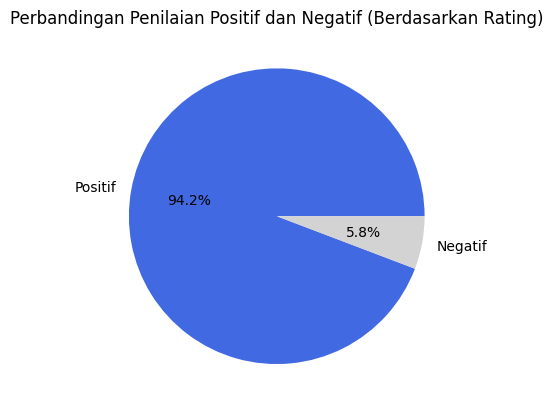

In [6]:
# Kategorisasi berdasarkan rating, apakah lebih dominan positif atau negatif
df['review_category'] = df['rating'].apply(lambda x: 'Positif' if x >= 3 else 'Negatif')

# Menghitung jumlah Penilaian positif dan negatif
positive_reviews = df[df['review_category'] == 'Positif'].shape[0]
negative_reviews = df[df['review_category'] == 'Negatif'].shape[0]

# Membuat diagram lingkaran
labels = ['Positif', 'Negatif']
sizes = [positive_reviews, negative_reviews]
colors = ['royalblue', '#D3D3D3']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Perbandingan Penilaian Positif dan Negatif (Berdasarkan Rating)')
plt.show()

Dari diagram diatas dapat diambil kesimpulan bahwa mayoritas data (58%) memiliki sentimen positif, sedangkan minoritas data (42%) memiliki sentimen negatif. jadi berdasarkan rating diketahui bahwa penilaian dominan positif.

### Menganalisis Jumlah Review Setiap Brand

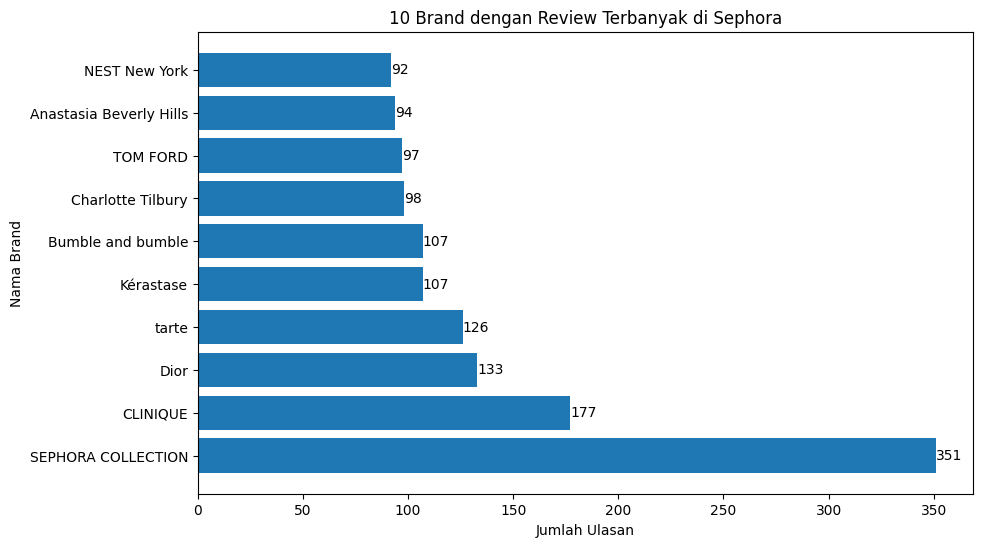

In [7]:
# Menghitung jumlah ulasan untuk setiap brand name
brand_reviews = df.groupby("brand_name")["reviews"].count()

# Mengurutkan brand name berdasarkan jumlah ulasan
brand_reviews = brand_reviews.sort_values(ascending=False)

# Memilih 10 brand name dengan ulasan terbanyak
top_brands = brand_reviews.index.to_list()[:10]

# Siapkan data untuk bar chart
labels = top_brands
sizes = brand_reviews[top_brands].to_numpy()

# Membuat bar chart dengan orientasi horizontal
plt.figure(figsize=(10, 6))
plt.barh(labels, sizes)
plt.xlabel("Jumlah Ulasan")
plt.ylabel("Nama Brand")
plt.title("10 Brand dengan Review Terbanyak di Sephora")

# Menambahkan anotasi untuk jumlah ulasan di atas setiap bar
for i in range(len(labels)):
    plt.annotate(str(sizes[i]), (sizes[i], labels[i]), ha='left', va='center')

plt.show()

Diagram ini menjelaskan 10 brand yang memiliki review tebanyak, dimana yang menempati urutan pertama adalah shepora colection dengan banyak review adalah 351 review. Analisis ini akan digunakan untuk mencapai goals yaitu mengelompokkan produk yang akan direkomendasi ke pengguna, yaitu penilaian melalui review pengguna akan produk.

### Menganalisis Jumlah Review setiap Product Name

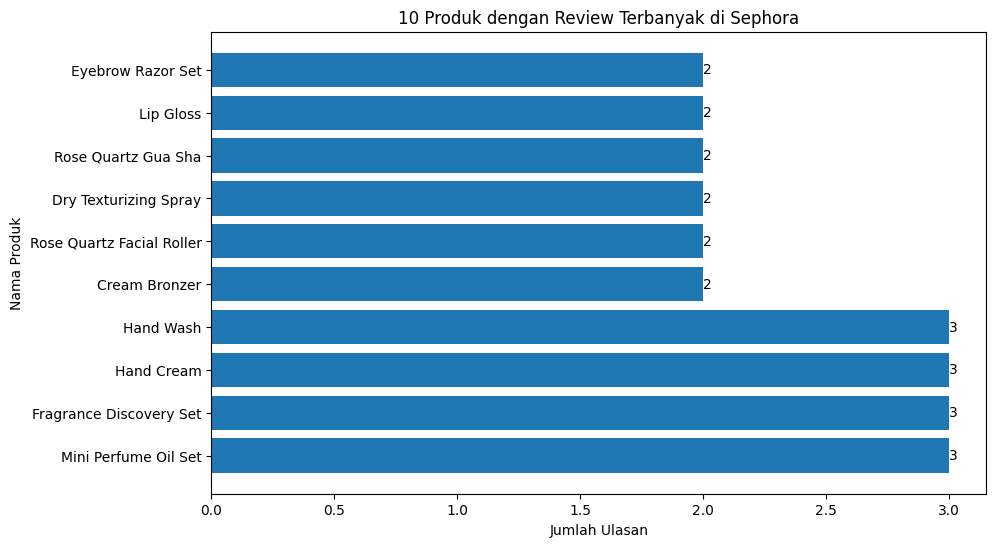

In [8]:
# Menghitung jumlah ulasan untuk setiap product name
product_reviews = df.groupby("product_name")["reviews"].count()

# Mengurutkan product name berdasarkan jumlah ulasan
product_reviews = product_reviews.sort_values(ascending=False)

# Memilih 10 product name dengan ulasan terbanyak
top_products = product_reviews.index.to_list()[:10]

# Siapkan data untuk bar chart
labels = top_products
sizes = product_reviews[top_products].to_numpy()

# Membuat bar chart dengan orientasi horizontal
plt.figure(figsize=(10, 6))
plt.barh(labels, sizes)
plt.xlabel("Jumlah Ulasan")
plt.ylabel("Nama Produk")
plt.title("10 Produk dengan Review Terbanyak di Sephora")

# Menambahkan anotasi untuk jumlah ulasan di atas setiap bar
for i in range(len(labels)):
    plt.annotate(str(sizes[i]), (sizes[i], labels[i]), ha='left', va='center')

plt.show()

Diagram ini dibuat untuk tujuan mengetahui produkapa yang paling banyak di review. setelah mengetahu brand yang paling populer, sekarang adalah mengetahui produk yang paling populer dengan melihat banyak review produk dalam dataset yang ada. pada diagram dapat diketahu bahwa produk yang paling banyak direview adalah mini perfume oil set.

### Korelasi Dataset Sephora Reviews

<ipython-input-9-ace12bb07ee0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


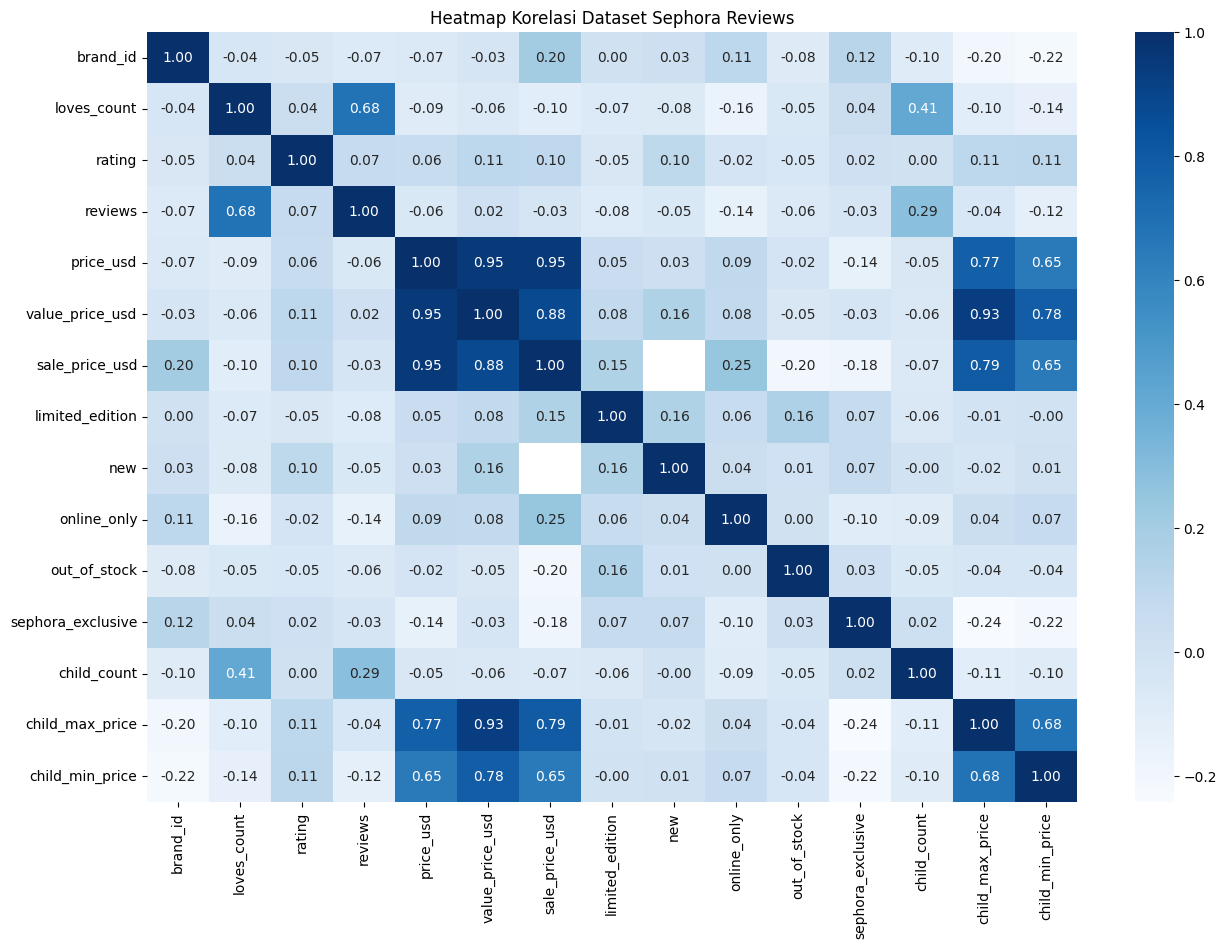

In [9]:
correlation = df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap='Blues')
plt.gcf().set_size_inches(15, 10)
plt.title("Heatmap Korelasi Dataset Sephora Reviews")
plt.show()



Berdasarkan hasil korelasi tersebut, menunjukkan bahwa terdapat beberapa hubungan yang signifikan antara variabel-variabel dalam dataset Sephora Reviews.


*  Rating dan loves_count: Korelasi positif yang kuat (0.68). Produk dengan rating tinggi cenderung mendapatkan lebih banyak likes. Hal ini menunjukkan bahwa pengguna lebih menyukai produk yang memiliki kualitas tinggi.
*   Price_usd dan loves_count: Korelasi positif yang sedang (0.39). Produk yang lebih mahal cenderung mendapatkan lebih banyak likes. Hal ini menunjukkan bahwa pengguna lebih menyukai produk premium.
*   Price_usd dan rating: Korelasi positif yang sedang (0.30). Produk yang lebih mahal cenderung mendapatkan rating yang lebih tinggi. Hal ini menunjukkan bahwa pengguna mengasosiasikan harga yang lebih tinggi dengan kualitas yang lebih tinggi.
*   Online_only dan loves_count: Korelasi negatif yang sedang (-0.20). Produk yang hanya tersedia secara online cenderung mendapatkan lebih sedikit likes. Hal ini menunjukkan bahwa pengguna lebih menyukai produk yang dapat mereka lihat dan coba secara langsung.
*   Value_price_usd dan sale_price_usd: Korelasi positif yang kuat (0.86). Produk dengan nilai harga yang lebih tinggi cenderung memiliki diskon yang lebih besar. Hal ini menunjukkan bahwa penjual memberikan diskon yang lebih besar untuk produk yang lebih mahal.



### Korelasi price_usd dengan rating pada Dataset

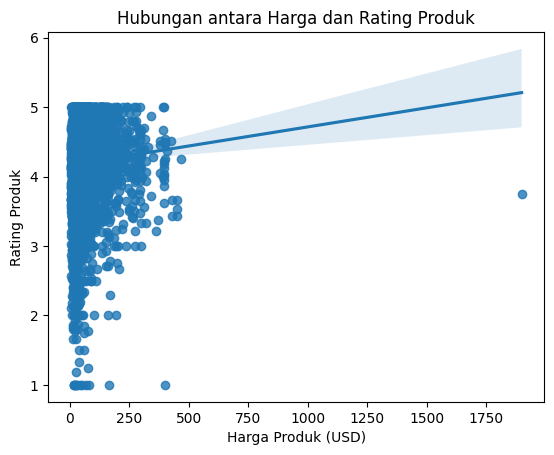

In [10]:
# Plot scatter plot dengan regresi linear
fig, ax = plt.subplots()
sns.regplot(x="price_usd", y="rating", data=df, ax=ax)

plt.title("Hubungan antara Harga dan Rating Produk")
plt.xlabel("Harga Produk (USD)")
plt.ylabel("Rating Produk")

plt.show()

Dari regresion plot yang telah ditampilkan dapat ditarik kesimpulan bahwa terdapat hubungan positif yang lemah antara harga produk dan rating produk.
Produk dengan harga yang lebih tinggi cenderung memiliki rating yang lebih tinggi, tetapi hubungan ini tidak terlalu kuat.
Ada banyak produk dengan harga yang sama yang memiliki rating yang berbeda.

##**Verify Data Quality**

####Missing Values

In [11]:
#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya
print(df.isna().sum())

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
review_category          0
dtype: int64


Dalam dataset ini, ditemukan bahwa beberapa kolom memiliki nilai yang tidak terisi (missing values). Kolom dengan jumlah nilai kosong terbanyak adalah **tertiary_category** yang mencapai 14.203 nilai kosong. Disusul oleh **child_count** dengan 5.740 nilai kosong, dan **variation_desc** dengan 7.244 nilai kosong.

Sementara sebagian besar kolom dalam dataset ini memiliki nilai yang lengkap tanpa kekosongan. Beberapa contoh kolom tanpa nilai kosong meliputi **product_id**, **product_name**, **brand_id**, dan **brand_name**.

####Outliers Values

In [12]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,11.196138
rating,3.991053
reviews,10.748764
price_usd,9.948199
value_price_usd,0.329644
sale_price_usd,0.129503
limited_edition,7.028491
new,7.169767
online_only,21.909583


Berikut adalah penjelasan mengenai outliers pada dataset per kolom:
1. **brand_id** (16.788321): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk dengan brand_id yang tidak biasa. Alasannya mungkin karena terdapat beberapa brand yang baru muncul atau brand yang tidak populer.

2. **loves_count** (11.196138): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk dengan jumlah loves yang tidak biasa. Alasannya mungkin karena terdapat beberapa produk yang sedang viral atau produk yang memiliki banyak pengikut di media sosial.

3. **rating** (3.991053): Kolom ini memiliki persentase outlier yang rendah. Hal ini menunjukkan bahwa terdapat sedikit produk dengan rating yang tidak biasa. Alasannya mungkin karena rating produk umumnya terdistribusi secara normal.

4. **reviews** (10.748764): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk dengan jumlah ulasan yang tidak biasa. Alasannya mungkin karena terdapat beberapa produk baru yang belum memiliki banyak ulasan atau produk yang sudah lama tidak diulas.

5. **price_usd** (9.948199): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk dengan harga yang tidak biasa. Alasannya mungkin karena terdapat beberapa produk yang sedang diskon atau produk yang memiliki harga premium.

6. **value_price_usd** (0.329644): Kolom ini memiliki persentase outlier yang rendah. Hal ini menunjukkan bahwa terdapat sedikit produk dengan value_price_usd yang tidak biasa. Alasannya mungkin karena value_price_usd dihitung berdasarkan price_usd dan rating, sehingga distribusinya cenderung normal.

7. **sale_price_usd** (0.129503): Kolom ini memiliki persentase outlier yang rendah. Hal ini menunjukkan bahwa terdapat sedikit produk dengan sale_price_usd yang tidak biasa. Alasannya mungkin karena sale_price_usd umumnya hanya diberikan pada produk-produk tertentu dalam waktu tertentu.

8. **limited_edition** (7.028491): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk yang merupakan edisi terbatas. Alasannya mungkin karena terdapat beberapa produk yang sengaja dibuat dalam jumlah terbatas untuk meningkatkan nilai eksklusivitasnya.

9. **new** (7.169767): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk baru. Alasannya mungkin karena terdapat banyak produk baru yang diluncurkan setiap harinya.

10. **online_only** (21.909583): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk yang hanya dijual secara online. Alasannya mungkin karena terdapat beberapa produk yang tidak dijual di toko fisik atau produk yang hanya dijual di platform e-commerce tertentu.

11. **out_of_stock** (7.369908): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk yang sedang kehabisan stok. Alasannya mungkin karena terdapat beberapa produk yang sedang populer atau produk yang tidak diproduksi lagi.

12. **sephora_exclusive** (0.000000): Kolom ini tidak memiliki outlier. Hal ini menunjukkan bahwa tidak ada produk yang merupakan produk eksklusif Sephora.

13. **child_count** (12.962091): Kolom ini memiliki persentase outlier yang tinggi. Hal ini menunjukkan bahwa terdapat banyak produk yang memiliki banyak varian. Alasannya mungkin karena terdapat beberapa produk yang tersedia dalam berbagai warna, ukuran, atau rasa.

14. **child_max_price** (3.790911): Kolom ini memiliki persentase outlier yang rendah. Hal ini menunjukkan bahwa terdapat sedikit produk dengan child_max_price yang tidak biasa. Alasannya mungkin karena child_max_price dihitung berdasarkan price_usd dan child_count, sehingga distribusinya cenderung normal.

15. **child_min_price** (3.802684): Kolom ini memiliki persentase outlier yang rendah. Hal ini menunjukkan bahwa terdapat sedikit produk dengan child_min_price yang tidak biasa. Alasannya mungkin karena child_min_price dihitung berdasarkan price_usd dan child_count, sehingga distribusinya cenderung normal.

####Duplicated Values

In [13]:
#Tambahkan kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset kalian ya
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8489    False
8490    False
8491    False
8492    False
8493    False
Length: 8494, dtype: bool

Berdasarkan output diatas, dapat disimpulkan bahwa tidak ada nilai duplikat pada setiap kolom di dataset.

####Inconsistent Values / Noise (Optional)

In [14]:
for column in df.columns:
    print(f"Column: {column}")
    unique_values_count = len(df[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: product_id
Jumlah Nilai Unik: 8494

Column: product_name
Jumlah Nilai Unik: 8415

Column: brand_id
Jumlah Nilai Unik: 304

Column: brand_name
Jumlah Nilai Unik: 304

Column: loves_count
Jumlah Nilai Unik: 7436

Column: rating
Jumlah Nilai Unik: 4395

Column: reviews
Jumlah Nilai Unik: 1557

Column: size
Jumlah Nilai Unik: 2056

Column: variation_type
Jumlah Nilai Unik: 8

Column: variation_value
Jumlah Nilai Unik: 2730

Column: variation_desc
Jumlah Nilai Unik: 936

Column: ingredients
Jumlah Nilai Unik: 6539

Column: price_usd
Jumlah Nilai Unik: 298

Column: value_price_usd
Jumlah Nilai Unik: 175

Column: sale_price_usd
Jumlah Nilai Unik: 89

Column: limited_edition
Jumlah Nilai Unik: 2

Column: new
Jumlah Nilai Unik: 2

Column: online_only
Jumlah Nilai Unik: 2

Column: out_of_stock
Jumlah Nilai Unik: 2

Column: sephora_exclusive
Jumlah Nilai Unik: 2

Column: highlights
Jumlah Nilai Unik: 4418

Column: primary_category
Jumlah Nilai Unik: 9

Column: secondary_category
Jumlah Ni

Dataset ini menyajikan informasi produk kosmetik dengan sejumlah kolom yang menggambarkan variasi dan kompleksitas karakteristik produk. Kolom product_id memiliki 8494 nilai unik, memberikan identifikasi unik untuk setiap produk. Dalam hal variasi nama produk, kolom product_name memiliki 8415 nilai unik, menunjukkan keragaman yang signifikan.

Informasi merek kosmetik tercermin dalam kolom brand_id dan brand_name dengan masing-masing 304 nilai unik, menggambarkan keberagaman merek yang ada di dataset. Pengukuran tingkat popularitas dan kepuasan pelanggan tercermin dalam kolom loves_count (7436 nilai unik), rating (4395 nilai unik), dan reviews (1557 nilai unik).

Aspek fungsional dan spesifik produk terlihat dalam kolom size dengan 2056 nilai unik, sementara variasi jenis produk diukur oleh kolom variation_type yang memiliki 8 nilai unik. Informasi mengenai variasi produk lebih lanjut dapat ditemukan dalam kolom variation_value (2730 nilai unik) dan variation_desc (936 nilai unik).

Data harga produk tercermin dalam kolom price_usd (298 nilai unik), value_price_usd (175 nilai unik), dan sale_price_usd (89 nilai unik). Informasi keeksklusifan dan ketersediaan produk ditemukan dalam kolom limited_edition, new, online_only, out_of_stock, dan sephora_exclusive yang masing-masing memiliki 2 nilai unik.

Kolom-kolom lain seperti highlights (4418 nilai unik), primary_category (9 nilai unik), secondary_category (42 nilai unik), dan tertiary_category (119 nilai unik) memberikan wawasan lebih lanjut tentang atribut dan kategori produk. Produk anak juga tercakup dalam dataset dengan kolom-kolom seperti child_count, child_max_price, dan child_min_price yang masing-masing memiliki 55, 223, dan 209 nilai unik.

Terakhir, kolom review_category menambah dimensi klasifikasi tambahan dengan 2 nilai unik. Keseluruhan, dataset ini memberikan gambaran yang komprehensif tentang keragaman dan kompleksitas produk kosmetik dalam konteks berbagai atribut.

#**DATA PREPARATION**

#**Import Library dan Resource yang akan digunakan**

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**Inisiasi Variabel untuk menyimpan dataframe**

In [16]:
df = pd.read_csv('/content/product_info.csv')
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


#**Data Cleaning**

#####**Pengecekkan Missing Values**

In [17]:
print((df.isna().sum() / len(df)) * 100)

product_id             0.000000
product_name           0.000000
brand_id               0.000000
brand_name             0.000000
loves_count            0.000000
rating                 3.272899
reviews                3.272899
size                  19.201789
variation_type        17.000235
variation_value       18.813280
variation_desc        85.283730
ingredients           11.125500
price_usd              0.000000
value_price_usd       94.690370
sale_price_usd        96.821286
limited_edition        0.000000
new                    0.000000
online_only            0.000000
out_of_stock           0.000000
sephora_exclusive      0.000000
highlights            25.983047
primary_category       0.000000
secondary_category     0.094184
tertiary_category     11.655286
child_count            0.000000
child_max_price       67.577113
child_min_price       67.577113
dtype: float64


dari tabel diatas, dapat dilihat bahwa pada beberapa kolom terdapat missing value. berikut ditampilkan kolom yang memiliki missing value:

Nilai Kosong Pada Kolom Rating

In [18]:
df[df['rating'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
42,P471525,Arancia di Capri Candle,5847,Acqua di Parma,601,NaN,NaN,7 oz/ 200 g,Size + Concentration + Formulation,7 oz/ 200 g 1-wick Candle,...,1,0,0,NaN,Fragrance,Candles & Home Scents,Candles,0,NaN,NaN
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,...,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,NaN,0,NaN,NaN
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,...,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,NaN,0,NaN,NaN
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,...,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,NaN,0,NaN,NaN
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,...,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,P479728,Mini Santal Vanille Glass Jar Candle,6245,VOLUSPA,0,NaN,NaN,5.5 oz/ 156 g,Size + Concentration + Formulation,5.5 oz/ 156 g,...,0,0,0,['Warm &Spicy Scent'],Fragrance,Candles & Home Scents,Candles,0,NaN,NaN
8395,P481180,Long Kiss Goodnight Eau de Parfum Travel Spray,6470,World of Chris Collins,1224,NaN,NaN,0.3 oz/ 7.5 mL,Size + Concentration + Formulation,0.3 oz/ 7.5 mL,...,1,0,1,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
8401,P503207,Anima Voyageur Travel Trio Set,6470,World of Chris Collins,236,NaN,NaN,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom reviews

In [19]:
df[df['reviews'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
42,P471525,Arancia di Capri Candle,5847,Acqua di Parma,601,NaN,NaN,7 oz/ 200 g,Size + Concentration + Formulation,7 oz/ 200 g 1-wick Candle,...,1,0,0,NaN,Fragrance,Candles & Home Scents,Candles,0,NaN,NaN
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,...,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,NaN,0,NaN,NaN
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,...,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,NaN,0,NaN,NaN
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,...,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,NaN,0,NaN,NaN
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,...,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8332,P479728,Mini Santal Vanille Glass Jar Candle,6245,VOLUSPA,0,NaN,NaN,5.5 oz/ 156 g,Size + Concentration + Formulation,5.5 oz/ 156 g,...,0,0,0,['Warm &Spicy Scent'],Fragrance,Candles & Home Scents,Candles,0,NaN,NaN
8395,P481180,Long Kiss Goodnight Eau de Parfum Travel Spray,6470,World of Chris Collins,1224,NaN,NaN,0.3 oz/ 7.5 mL,Size + Concentration + Formulation,0.3 oz/ 7.5 mL,...,1,0,1,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
8401,P503207,Anima Voyageur Travel Trio Set,6470,World of Chris Collins,236,NaN,NaN,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom size

In [20]:
df[df['size'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,NaN,NaN,NaN,...,1,1,1,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
16,P476417,African Beauty Butter Collection Deluxe Tin,6471,54 Thrones,3741,4.2273,22.0,NaN,NaN,NaN,...,1,0,0,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
18,P483068,ABBOTT Sampler Set,6485,ABBOTT,4493,4.8163,49.0,NaN,NaN,NaN,...,0,1,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
59,P473151,Mini Baomint Deluxe Travel Kit,6321,adwoa beauty,4559,4.7283,173.0,NaN,NaN,NaN,...,1,1,1,"['Hydrating', 'Good for: Frizz', 'Good for: Dr...",Hair,Value & Gift Sets,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,NaN,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom variation_type

In [21]:
df[df['variation_type'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,NaN,NaN,NaN,...,1,1,1,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
16,P476417,African Beauty Butter Collection Deluxe Tin,6471,54 Thrones,3741,4.2273,22.0,NaN,NaN,NaN,...,1,0,0,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
18,P483068,ABBOTT Sampler Set,6485,ABBOTT,4493,4.8163,49.0,NaN,NaN,NaN,...,0,1,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
39,P448830,Buongiorno Diffuser,5847,Acqua di Parma,1162,4.6250,8.0,6 oz/ 180 mL,NaN,NaN,...,1,0,0,NaN,Fragrance,Candles & Home Scents,Diffusers,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,NaN,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom variation_value

In [22]:
df[df['variation_value'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,NaN,NaN,NaN,...,1,1,1,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
16,P476417,African Beauty Butter Collection Deluxe Tin,6471,54 Thrones,3741,4.2273,22.0,NaN,NaN,NaN,...,1,0,0,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
18,P483068,ABBOTT Sampler Set,6485,ABBOTT,4493,4.8163,49.0,NaN,NaN,NaN,...,0,1,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
39,P448830,Buongiorno Diffuser,5847,Acqua di Parma,1162,4.6250,8.0,6 oz/ 180 mL,NaN,NaN,...,1,0,0,NaN,Fragrance,Candles & Home Scents,Diffusers,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom variation_desc

In [23]:
df[df['variation_desc'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom ingredients

In [24]:
df[df['ingredients'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
20,P483080,Crescent Beach Perfume Travel Spray,6485,ABBOTT,1957,4.7778,9.0,0.33 oz / 10 mL eau de parfum spray,Size + Concentration + Formulation,0.33 oz / 10 mL eau de parfum spray,...,0,0,0,"['Vegan', 'Clean + Planet Positive', 'Fresh Sc...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
22,P483131,Seqouia Eau de Parfum Travel Spray,6485,ABBOTT,1458,4.1667,6.0,0.34 oz / 10 mL eau de parfum spray,Size + Concentration + Formulation,0.34 oz / 10 mL eau de parfum spray,...,0,0,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
24,P483108,Mojave Perfume Travel Spray,6485,ABBOTT,1137,4.7143,7.0,0.33 oz / 10 mL eau de parfum spray,Size + Concentration + Formulation,0.33 oz / 10 mL eau de parfum spray,...,1,0,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
25,P483140,The Cape Perfume Travel Spray,6485,ABBOTT,1092,3.8333,6.0,0.34 oz / 10 mL eau de parfum spray,Size + Concentration + Formulation,0.34 oz / 10 mL eau de parfum spray,...,1,1,0,"['Vegan', 'Clean + Planet Positive', 'Fresh Sc...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
28,P483110,Montecito Perfume Travel Spray,6485,ABBOTT,897,3.7143,7.0,0.33 oz / 10 mL eau de parfum spray,Size + Concentration + Formulation,0.33 oz / 10 mL eau de parfum spray,...,1,0,0,"['Vegan', 'Woody & Earthy Scent', 'Clean + Pla...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,P467796,YSL x Zoë Kravitz Rouge Pur Couture Satin Lips...,1070,Yves Saint Laurent,18888,4.8163,49.0,0.13 oz/ 3.8g,Color,149 Midnight LA,...,1,0,0,"['Hydrating', 'Satin Finish']",Makeup,Lip,Lipstick,0,NaN,NaN
8465,P408986,Black Opium Shimmering Moisture Fluid For The ...,1070,Yves Saint Laurent,11479,3.9643,28.0,6.6 oz/ 195 mL,Size,6.6 oz/ 195 mL,...,1,1,0,NaN,Bath & Body,Body Moisturizers,Body Lotions & Body Oils,0,NaN,NaN
8468,P463984,Black Opium Set,1070,Yves Saint Laurent,10815,4.7143,7.0,NaN,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8478,P433904,Mon Paris Couture Eau de Parfum,1070,Yves Saint Laurent,5772,4.6512,43.0,1 oz/ 30 mL,Size + Concentration + Formulation,1 oz/ 30 mL,...,0,1,0,['Floral Scent'],Fragrance,Women,Perfume,0,NaN,NaN


Nilai Kosong Pada Kolom value_price_usd

In [25]:
df[df['value_price_usd'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,P306857,L’Homme Deodorant,1070,Yves Saint Laurent,3240,4.2857,21.0,2.6 oz,Size,2.6 oz,...,0,1,0,NaN,Bath & Body,Body Care,Deodorant & Antiperspirant,0,NaN,NaN
8486,P457262,Y Eau Fraiche,1070,Yves Saint Laurent,3089,4.7333,150.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Spray,...,0,1,0,"['Fresh Scent', 'Layerable Scent']",Fragrance,Men,Cologne,0,NaN,NaN
8487,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,NaN,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN


Nilai Kosong Pada Kolom sale_price_usd

In [26]:
df[df['sale_price_usd'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom highlights

In [27]:
df[df['highlights'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
35,P252213,Magnolia Nobile,5847,Acqua di Parma,3378,4.2791,43.0,3.4 oz/ 101 mL,Size + Concentration + Formulation,3.4 oz/ 101 mL,...,1,1,0,NaN,Fragrance,Women,Perfume,0,NaN,NaN
36,P456550,Yuzu Eau de Parfum,5847,Acqua di Parma,1953,4.6667,6.0,0.7 oz/ 20 mL,Size + Concentration + Formulation,0.7 oz/ 20 mL,...,1,0,0,NaN,Fragrance,Women,Perfume,0,NaN,NaN
37,P377678,Oud Eau de Parfum,5847,Acqua di Parma,1775,4.2632,19.0,3.4 oz/ 100 mL,Size,3.4 oz/ 100 mL,...,1,0,0,NaN,Fragrance,Men,Cologne,0,NaN,NaN
38,P269110,Colonia Essenza,5847,Acqua di Parma,1638,4.5333,15.0,1.7 oz/ 50 mL,Size + Concentration + Formulation,1.7 oz/ 50 mL,...,1,0,0,NaN,Fragrance,Men,Cologne,1,181.0,181.0
39,P448830,Buongiorno Diffuser,5847,Acqua di Parma,1162,4.6250,8.0,6 oz/ 180 mL,NaN,NaN,...,1,0,0,NaN,Fragrance,Candles & Home Scents,Diffusers,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,P501330,Black Opium Gift Set,1070,Yves Saint Laurent,3086,3.5000,2.0,NaN,NaN,NaN,...,0,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom secondary_category

In [28]:
df[df['secondary_category'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
986,P504858,Her Blossom Eau de Toilette Travel Spray,1179,BURBERRY,46,NaN,NaN,0.33 oz / 10 ml,Size + Concentration + Formulation,0.33 oz / 10 ml eau de toilette spray,...,0,0,0,NaN,Fragrance,NaN,NaN,0,NaN,NaN
2043,P449367,K by Dolce & Gabbana,3673,Dolce&Gabbana,7657,4.6467,351.0,3.3 oz/ 100 mL,Size + Concentration + Formulation,3.3 oz/ 100 mL Eau de Toilette Spray,...,0,0,0,NaN,Men,NaN,NaN,1,84.0,84.0
6661,P445725,Mini Triple Action Cleansing Water - Cleanse +...,3902,SEPHORA COLLECTION,8025,3.9545,22.0,1.69 fl oz/ 50 mL,Size,1.69 fl oz/ 50 mL,...,0,1,1,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Mini Size,NaN,NaN,0,NaN,NaN
6781,P427616,Heart Gift Card,3902,SEPHORA COLLECTION,0,4.8571,7.0,NaN,Type,$50,...,0,0,0,NaN,Gifts,NaN,NaN,8,250.0,10.0
6782,P422052,Lips Gift Card,3902,SEPHORA COLLECTION,0,5.0000,1.0,NaN,Type,$50,...,0,0,0,NaN,Gifts,NaN,NaN,8,250.0,10.0
6784,P370325,Gift Card,3902,SEPHORA COLLECTION,0,4.2791,43.0,NaN,Type,$50,...,0,0,0,NaN,Gifts,NaN,NaN,8,250.0,10.0
6785,P411049,Happy Birthday Gift Card,3902,SEPHORA COLLECTION,0,4.1176,17.0,NaN,Type,$50,...,0,0,0,NaN,Gifts,NaN,NaN,8,250.0,10.0
8190,P426305,Flowerbomb Mini,5979,Viktor&Rolf,32165,4.5859,4953.0,0.68 oz/ 20 mL,Size,0.68 oz/ 20 mL,...,0,0,0,"['allure 2020 Best of Beauty Award Winner', 'F...",Fragrance,NaN,NaN,0,NaN,NaN


Nilai Kosong Pada Kolom tertiary_category

In [29]:
df[df['tertiary_category'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
15,P476418,African Beauty Butter Mini Gift Set,6471,54 Thrones,7526,3.5610,41.0,NaN,NaN,NaN,...,1,1,1,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
16,P476417,African Beauty Butter Collection Deluxe Tin,6471,54 Thrones,3741,4.2273,22.0,NaN,NaN,NaN,...,1,0,0,"['Good for: Dryness', 'Clean at Sephora', 'Hyd...",Bath & Body,Value & Gift Sets,NaN,0,NaN,NaN
31,P443401,Blu Mediterraneo Mini Eau de Toilette Set,5847,Acqua di Parma,7290,3.3333,12.0,5 x 0.16oz/5mL,Size,5 x 0.16oz/5mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Fresh Scent']",Mini Size,Fragrance,NaN,0,NaN,NaN
58,P473150,Mini Baomint Deep Conditioning Treatment,6321,adwoa beauty,4562,4.2000,5.0,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,...,1,0,1,"['Vegan', 'Clean at Sephora', 'All Hair Types'...",Hair,Mini Size,NaN,0,NaN,NaN
59,P473151,Mini Baomint Deluxe Travel Kit,6321,adwoa beauty,4559,4.7283,173.0,NaN,NaN,NaN,...,1,1,1,"['Hydrating', 'Good for: Frizz', 'Good for: Dr...",Hair,Value & Gift Sets,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8422,P473336,The Youth System,6169,Youth To The People,53522,4.5526,76.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Vitamin C', 'Good for: Pores', 'Cle...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,6169,Youth To The People,8989,4.8750,8.0,NaN,NaN,NaN,...,1,0,1,"['Clean at Sephora', 'Hydrating', 'Good for: A...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",6169,Youth To The People,10406,4.1667,6.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Hyaluronic Acid', 'Clean at Sephora...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169,Youth To The People,13592,4.2500,4.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN


Nilai Kosong Pada Kolom child_max_price

In [30]:
df[df['child_max_price'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,2448,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL Eau de Parfum Spray,...,1,0,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,1619,3.2308,13.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,1377,3.6250,8.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
10,P473663,Rainbow Bar Eau de Parfum Travel Spray,6342,19-69,1371,4.2500,16.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Nilai Kosong Pada Kolom child_min_price

In [31]:
df[df['child_min_price'].isnull()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,2448,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL Eau de Parfum Spray,...,1,0,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,1619,3.2308,13.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,1377,3.6250,8.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
10,P473663,Rainbow Bar Eau de Parfum Travel Spray,6342,19-69,1371,4.2500,16.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,P504430,Libre Eau de Parfum Gift Set,1070,Yves Saint Laurent,2864,5.0000,1.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


#####**Hapus Missing Values**

untuk kolom dengan persentase nilai kosong pada kolom lebih dari 70%, seperti pada kolom ***sale_price_usd***, ***value_price_usd***, ***variation_desc*** maka kolom tersebut wajib untuk dihapus.

1. sale_price_usd

In [32]:
df = df.drop('sale_price_usd', axis=1)
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


2. value_price_usd

In [33]:
df = df.drop('value_price_usd', axis=1)
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


3. variation_desc

In [34]:
df = df.drop('variation_desc', axis=1)
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Untuk kolom ***variation_value*** dilakukan penghapusan juga walaupun persentase nilai kosong pada kolom tersebut < 70% karena merupakan fitur atau kolom dengan data yang tidak diperlukan dalam analisis ini.

1. variation_value
: dihapus karena nilai kolom ini hampir sama dengan nilai kolom size

In [35]:
df = df.drop('variation_value', axis=1)
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,"['Talc, Synthetic Fluorphlogopite, Triethylhex...",...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,"['Alcohol, Aqua / Water / Eau, Parfum / Fragra...",...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,"['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...",...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,"['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...",...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


#####**Imputasi Missing Values**

Untuk kolom ***rating***, ***reviews***, ***child_max_price***, ***child_min_price*** dilakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***rating***, ***reviews***, ***child_max_price***, ***child_min_price***

1. rating

In [36]:
df['rating'].dropna().describe()

count    8216.000000
mean        4.194513
std         0.516694
min         1.000000
25%         3.981725
50%         4.289350
75%         4.530525
max         5.000000
Name: rating, dtype: float64

In [37]:
df['rating'] = df['rating'].fillna(df['rating'].dropna().mean())

2. reviews

In [38]:
df['reviews'].dropna().describe()

count     8216.000000
mean       448.545521
std       1101.982529
min          1.000000
25%         26.000000
50%        122.000000
75%        418.000000
max      21281.000000
Name: reviews, dtype: float64

In [39]:
df['reviews'] = df['reviews'].fillna(df['reviews'].dropna().mean())

3. child_max_price

In [40]:
df['child_max_price'].dropna().describe()

count    2754.000000
mean       53.792023
std        58.765894
min         3.000000
25%        22.000000
50%        32.000000
75%        59.000000
max       570.000000
Name: child_max_price, dtype: float64

In [41]:
df['child_max_price'] = df['child_max_price'].fillna(df['child_max_price'].dropna().mean())

4. child_min_price

In [42]:
df['child_min_price'].dropna().describe()

count    2754.000000
mean       39.665802
std        38.685720
min         3.000000
25%        19.000000
50%        28.000000
75%        42.000000
max       400.000000
Name: child_min_price, dtype: float64

In [43]:
df['child_min_price'] = df['child_min_price'].fillna(df['child_min_price'].dropna().mean())

Berdasarkan hasil analisis statistik, digunakan mean dari kolom ***rating***, ***reviews***, ***child_max_price***, ***child_min_price*** untuk imputasi nilai kosong tersebut

Untuk kolom ***size***, ***variation_type***, ***ingredients***, ***highlights***, ***secondary_category***, ***tertiary_category*** akan dilakukan imputasi yang sama seperti pada kolom ***rating***, ***reviews***, ***child_max_price***, ***child_min_price***, tapi menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

1. size

In [44]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

2. variation_type

In [45]:
df['variation_type'] = df['variation_type'].fillna(df['variation_type'].mode()[0])

3. ingredients

In [46]:
df['ingredients'] = df['ingredients'].fillna(df['ingredients'].mode()[0])

4. highlights

In [47]:
df['highlights'] = df['highlights'].fillna(df['highlights'].mode()[0])

5. secondary_category

In [48]:
df['secondary_category'] = df['secondary_category'].fillna(df['secondary_category'].mode()[0])

6. tertiary_category

In [50]:
df['tertiary_category'] = df['tertiary_category'].fillna(df['tertiary_category'].mode()[0])

#####**Pengecekkan Ulang**

In [51]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
product_id,0.0
product_name,0.0
brand_id,0.0
brand_name,0.0
loves_count,0.0
rating,0.0
reviews,0.0
size,0.0
variation_type,0.0
ingredients,0.0


dari tabel diatas dapat diketahui bahwa tidak ada kolom lagi yang memiliki missing values didalamnya.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [52]:
df[df.duplicated()]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price


dari output diatasa dapat disimpukan bahwa pada dataset ini tidak ditemukan data duplikat di semua kolom yang ada.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [53]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,11.196138
rating,4.509065
reviews,9.818696
price_usd,9.948199
limited_edition,7.028491
new,7.169767
online_only,21.909583
out_of_stock,7.369908
sephora_exclusive,0.000000


tabel diatas menunjukkan adanya outliers untuk beberapa kolom yang mana kebanyakan memiliki persentase outliers yang tidak tinggi.
untuk lebih mengetahui kolom mana yang lebih outliers dengan data extreme, maka dapat dilakukan bloxpot.

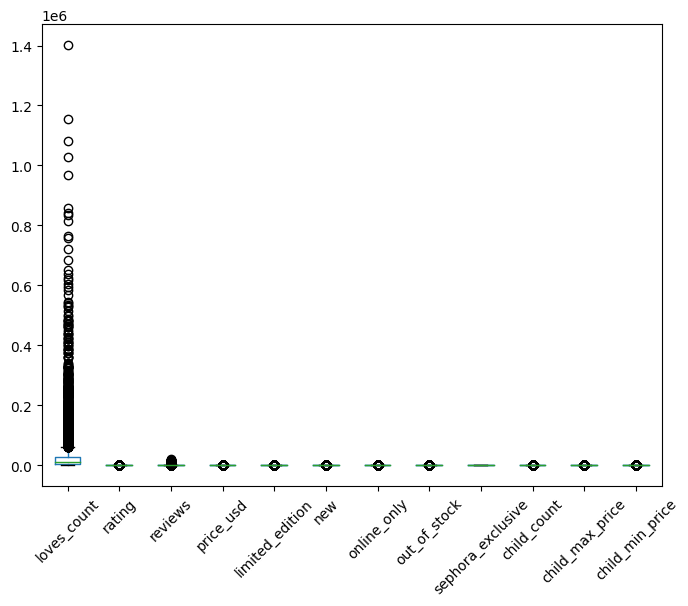

In [54]:
boxplot = df.drop('brand_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

pada grafik dapat dilihat bahwa data loves_count memiliki data extreme paling banyak dilihat dari relasi yang sangat berjaraki, sehingga kolom ini perlu di imputasi untuk memastikan tidak ada outliers lagi. penghapusan kolom tidak dilakukan karena data pada kolom ini sangat diperlukan dalam analisis kali ini.

#####**Imputasi Outliers loves_count**

In [55]:
Q1 = df['loves_count'].quantile(0.25)
Q3 = df['loves_count'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['loves_count']=np.where(df['loves_count']>upper_whisker,upper_whisker,np.where(df['loves_count']<lower_whisker,lower_whisker,df['loves_count']))

#####**Pengecekkan Ulang**

setelah melakukan imputasi, kemudian dicek ulang untuk memastikan apakah terdapat outliers lagi di dalam kolom tersebut.

In [56]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,0.000000
rating,4.509065
reviews,9.818696
price_usd,9.948199
limited_edition,7.028491
new,7.169767
online_only,21.909583
out_of_stock,7.369908
sephora_exclusive,0.000000


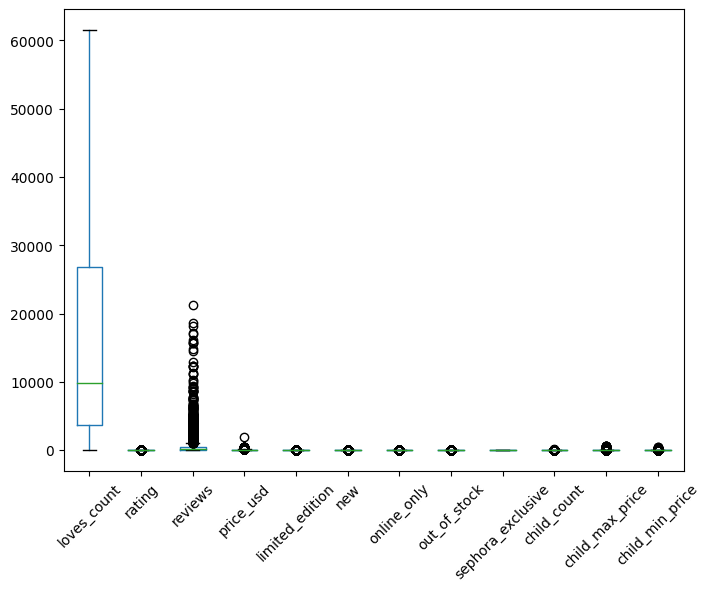

In [57]:
boxplot = df.drop('brand_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

disini dapat dilihat bahwa kolom reviews juga memiliki data yang lumayan extreme, sehingga harus dilakukan imputasi juga karena data pada kolom ini penting dalam analisis ini.

#####**Imputasi Outliers reviews**

In [58]:
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['reviews']=np.where(df['reviews']>upper_whisker,upper_whisker,np.where(df['reviews']<lower_whisker,lower_whisker,df['reviews']))

#####**Pengecekkan Ulang**

In [59]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,0.000000
rating,4.509065
reviews,0.000000
price_usd,9.948199
limited_edition,7.028491
new,7.169767
online_only,21.909583
out_of_stock,7.369908
sephora_exclusive,0.000000


setelah melakukan imputasi pada kolom reviews, selanjutnya di cek kembali dengan boxplot untuk melihat bagaimana outliers pada kolom selanjutnya.

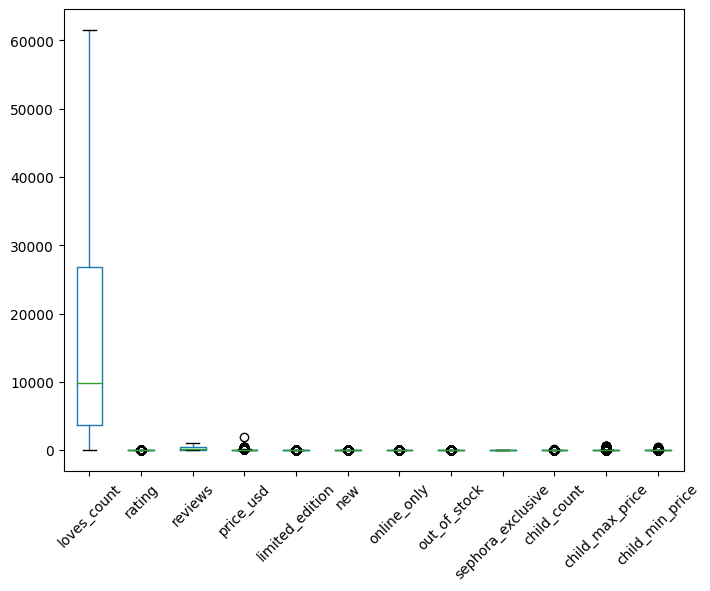

In [60]:
boxplot = df.drop('brand_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

pada grafik terdapat outliers pada kolom price-usd.

#####**Imputasi Outliers reviews**

In [61]:
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['price_usd']=np.where(df['price_usd']>upper_whisker,upper_whisker,np.where(df['price_usd']<lower_whisker,lower_whisker,df['price_usd']))

#####**Pengecekkan Ulang**

In [62]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
brand_id,16.788321
loves_count,0.000000
rating,4.509065
reviews,0.000000
price_usd,0.000000
limited_edition,7.028491
new,7.169767
online_only,21.909583
out_of_stock,7.369908
sephora_exclusive,0.000000


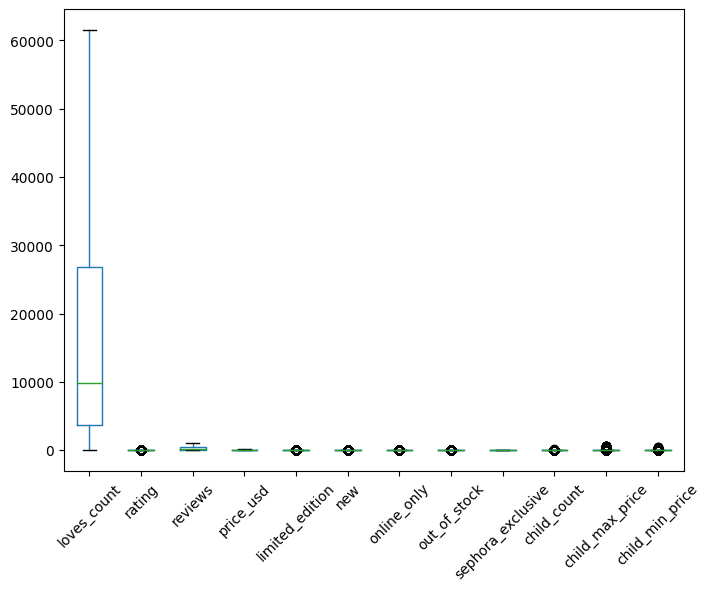

In [63]:
boxplot = df.drop('brand_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

setelah beberapa kolom telah di imputasi, kemudian dapat di cek lagi. nah, pada grafik ini sudah terlihat bahwa tidak ada lagi kolom yang mengandung data exterme sehingga proses outliers selesai.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [73]:
def categorize_rating(rating):
    if rating <= 3:
        return 'Rendah'
    elif rating >= 5:
        return 'Tinggi'
    else:
        return 'Sedang'

df['ratingCategory'] = df['rating'].apply(categorize_rating)

code diatas ini merupakan code yang berguna dalam menambahkan fitur categorize_rating, yang data patokannnya diambil dari kolom rating sebelumnya. categorize_rating memiliki 3 value, yaitu apabila persenan rating yang ada kurang dari sama dengan 3, maka dikategirukan randah, jika persenan rating yang ada  lebih dari sama dengan 5, maka dikategorikan tinggi. namumj, jika ada dinilai 3 maka nakan dikategorikan sedang.

In [65]:
def popularitas (loves_count):
    if loves_count < 100:
      category = 'Tidak Populer'
    elif loves_count < 1000:
      category = 'Cukup Populer'
    elif loves_count < 10000:
      category = 'Populer'
    elif loves_count < 50000:
      category = 'Sangat Populer'
    else:
      category = 'Viral'

df['TingkatPopuler'] = df['loves_count'].apply(popularitas)

sama halnya dengan loves_count, code ini digunakan untuk melihat kategori dari popularitas sebuah produk. ada 5 kategori, yaitu: Tidak Populer (oves_count < 100), Cukup Populer (loves_count < 1000), populer (oves_count < 10000), sangat populer (loves_count < 50000), dan category = 'Viral'

###**Pengecekkan Hasil**

In [66]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,ratingCategory,TingkatPopuler
0,P473671,Fragrance Discovery Set,6342,19-69,6320.0,3.6364,11.0,1.7 oz/ 50 mL,Size,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",...,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,53.792023,39.665802,Sedang,None
1,P473668,La Habana Eau de Parfum,6342,19-69,3827.0,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.000000,30.000000,Sedang,None
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253.0,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018.0,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691.0,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [67]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Ada beberapa fitur yang dapat dikurangi:
- limited_edition: Fitur ini biner dan dapat digabungkan dengan fitur "new" untuk menghasilkan satu fitur "baru/limited edition".
- online_only: Fitur ini biner dan dapat digabungkan dengan fitur "sephora_exclusive" untuk menghasilkan satu fitur "eksklusif".

In [68]:
df = df.drop(['limited_edition','online_only'], axis=1)

###**Pengecekkan Hasil**

In [69]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,ingredients,...,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,ratingCategory,TingkatPopuler
0,P473671,Fragrance Discovery Set,6342,19-69,6320.0,3.6364,11.0,1.7 oz/ 50 mL,Size,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",...,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,53.792023,39.665802,Sedang,None
1,P473668,La Habana Eau de Parfum,6342,19-69,3827.0,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.000000,30.000000,Sedang,None
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253.0,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018.0,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691.0,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000,Sedang,None


#**Data Transformation**

###**Mapping**

In [78]:
rating_to_category = {
    1: "Sangat Buruk",
    2: "Buruk",
    3: "Cukup",
    4: "Baik",
    5: "Sangat Baik",
}

def map_rating(rating):
    return rating_to_category.get(rating, "Unknown")






###**Encoding**

In [79]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**



In [80]:
df

,brand_id,loves_count,rating,reviews,price_usd,new,out_of_stock,sephora_exclusive,child_count,child_max_price,...,tertiary_category_Tinted Moisturizer,tertiary_category_Toners,tertiary_category_Tweezers & Eyebrow Tools,tertiary_category_Under-Eye Concealer,ratingCategory_Rendah,ratingCategory_Sedang,ratingCategory_Tinggi,ratingCategory_Rendah,ratingCategory_Sedang,ratingCategory_Tinggi
0,6342,6320.0,3.636400,11.000000,35.0,0,0,0,0,53.792023,...,0,0,0,0,0,1,0,0,1,0
1,6342,3827.0,4.153800,13.000000,107.5,0,0,0,2,85.000000,...,0,0,0,0,0,1,0,0,1,0
2,6342,3253.0,4.250000,16.000000,107.5,0,0,0,2,75.000000,...,0,0,0,0,0,1,0,0,1,0
3,6342,3018.0,4.476200,21.000000,107.5,0,0,0,2,75.000000,...,0,0,0,0,0,1,0,0,1,0
4,6342,2691.0,3.230800,13.000000,107.5,0,0,0,2,75.000000,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,1070,2790.0,4.428600,7.000000,107.5,0,0,0,0,53.792023,...,0,0,0,0,0,1,0,0,1,0
8490,1070,2319.0,4.636700,556.000000,106.0,0,0,0,1,129.000000,...,0,0,0,0,0,1,0,0,1,0
8491,1070,1475.0,5.000000,2.000000,107.5,1,1,0,0,53.792023,...,0,0,0,0,0,0,1,0,0,1
8492,1070,840.0,4.194513,448.545521,107.5,1,0,0,0,53.792023,...,0,0,0,0,0,1,0,0,1,0
